# RQ1 - What software artifacts are available for the automation of TD management?

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


path = '../data/Step1_artifacts.json'

artifacts_df = pd.read_json(path, orient='index')

tdma_list = ['repayment',
            'monitoring',
            'measurement',
            'identification',
            'communication',
            'prevention',
            'priorization',
            'representation/documentation']

td_types_list = ['code',
                 'design',
                 'architectural',
                 'test',
                 'documentation',
                 'requirements',
                 'build',
                 'infrastructure',
                 'versioning',
                 'satd']

def to_1D(series):
 return pd.Series([x for _list in series for x in _list])

### RQ1.1 - What is the type of software of the artifact (e.g., script, tool, library)?

In [2]:
#Software Types
artifacts_df.loc[:,['type', 'name']].groupby('type').count().sort_values(by='name', ascending=False)

,name
type,
tool,57
plugin,38
script,22
bot,4


In [3]:
# Number of plugins that are versions of tools
values = artifacts_df.loc[:,['type', 'name']].groupby('name').count()
len(values.loc[values['type'] > 1])

22

### RQ1.2 - What are the inputs and outputs of the artifact?

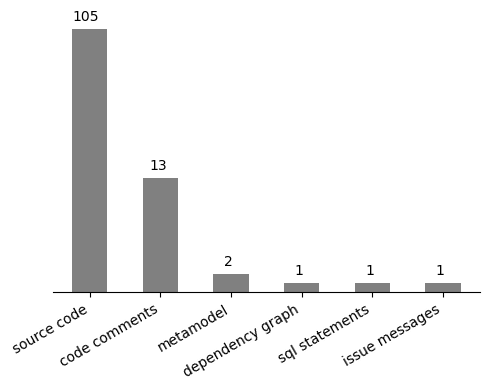

In [4]:
input_info = to_1D(artifacts_df['input_info']).value_counts()

width = 0.25
x_pos = [0 + (2* x * width) for x in range(len(input_info))]

plt.rcParams["figure.figsize"] = (5,4)
fig, ax = plt.subplots(layout='tight')
ax.bar(x_pos, height=input_info, width = width, color = 'grey')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)

scale = 30

ax.set_ylim([0,scale])
ax.set_yticks([])

for index, value in enumerate(input_info):
    if value > 100:
        factor = 0.5
    elif value > 10:
        factor = 0.32
    else:
        factor = 0.2
        
    ax.text(x_pos[index] - factor * width, value + 1 if value <= scale else scale + 1,
             str(value))

plt.xticks(x_pos, input_info.index, rotation=30, ha='right')
plt.savefig('../figures/rq1-inuput-info.pdf', bbox_inches='tight')

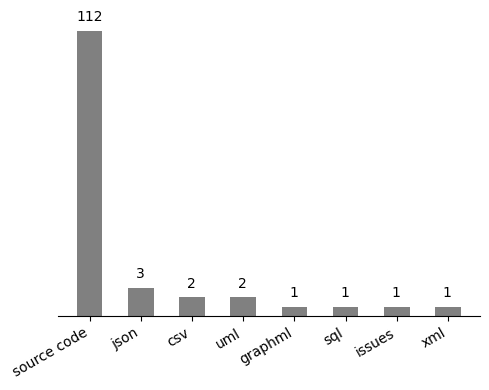

In [5]:
input_format = to_1D(artifacts_df['input_fmt']).value_counts()
width = 0.25
x_pos = [0 + (2* x * width) for x in range(len(input_format))]

plt.rcParams["figure.figsize"] = (5,4)
fig, ax = plt.subplots(layout='tight')
ax.bar(x_pos, height=input_format, width = width, color = 'grey')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)

scale = 30

ax.set_ylim([0,scale])
ax.set_yticks([])

for index, value in enumerate(input_format):
    if value > 100:
        factor = 0.5
    elif value > 10:
        factor = 0.32
    else:
        factor = 0.2
        
    ax.text(x_pos[index] - factor * width, value + 1 if value <= scale else scale + 1,
             str(value))

    
fmts = ['source code', 'json', 'csv', 'uml', 'graphml', 'sql', 'issues', 'xml']    
plt.xticks(x_pos, fmts, rotation=30, ha='right')
plt.savefig('../figures/rq1-inuput-fmt.pdf', bbox_inches='tight')

In [16]:
#Output Info
output_info = to_1D(artifacts_df['output_info']).value_counts()
pd.DataFrame(output_info.items(), columns=['output-info','n-artifacts']).to_csv('../data/rq1-output-infos.csv')
print(output_info)

code violations                43
code metrics                   34
code smells                    28
amount of technical debt       15
self-admitted td items         14
architectural smells           14
design smells                  12
refactoring suggestions        10
test coverage                   3
code duplications               3
maintainability index           3
amount of interest              2
td items                        2
design metrics                  2
cyclomatic complexity           2
refactoring actions             1
dependencies                    1
configuration smells            1
values for each refactoring     1
database smells                 1
quality level                   1
break changes in libraries      1
architectural td index          1
dependency graph                1
metrics reports                 1
security issues                 1
Name: count, dtype: int64


In [17]:
len(output_info)

26

In [18]:
#Output Formats
output_fmts = to_1D(artifacts_df['output_fmt']).value_counts()
pd.DataFrame(output_fmts.items(), columns=['output-fmt','n-artifacts']).to_csv('../data/rq1-output-fmts.csv')
print(output_fmts)

text                                   37
xml                                    28
csv                                    26
json                                   25
html                                   22
pull requests                           5
pdf                                     3
database(sql)                           3
runs inside ide                         2
database (sql)                          2
excel                                   2
github                                  1
gitlab                                  1
software refactored and new metrics     1
no output                               1
sarif                                   1
not informed                            1
jira/github issues                      1
comment                                 1
inside eclipse                          1
integrates with ide                     1
pull request report                     1
source code level via api               1
source code                       

### RQ1.3 - Which is the maturity level of the software artifact?

In [ ]:
# Maturity
artifacts_df.loc[:,['maturity', 'name']].groupby(['maturity']).count()

In [ ]:
#Maturity x TD Type
artifacts_df.loc[:,['maturity', 'name', 'type']].groupby(['type', 'maturity']).count()

In [ ]:
# Maturity x Input Format
input_format = set([x for i in artifacts_df.index for x in artifacts_df['input_info'][i]])

In [ ]:
for x in input_format:
    maturity = {
    'Examples':0,
    'Academic Studies':0,
    'Industrial Studies':0,
    'Industrial Applications':0
    }
    
    for i in artifacts_df.index:
        if x in artifacts_df['input_info'][i]:
            maturity[artifacts_df['maturity'][i]] += 1
    print(f'{x} : {maturity}')